In [1]:
import pandas as pd 
import numpy as np 
import json
import os 

In [3]:
filename="/data/digbose92/MuSE_Loreal_study/MUSE_LOreal_Metadata_outputs.xlsx"
sheet_name="NIELSEN_FINAL_COMBINED_OUTPUT_U"
data=pd.read_excel(filename,sheet_name=sheet_name)

In [4]:
video_data=data[data['Filename'].str.endswith('.mp4')]

In [6]:
from collections import Counter
product_advertiser_list=list(video_data['ProductAdvertiser'])
product_advertiser_list_counter=Counter(product_advertiser_list)
unique_product_advertiser=list(set(product_advertiser_list_counter.keys()))

In [24]:
#average female screentime per unique advertiser
import math

female_screen_time_list=[]
for advertiser_name in unique_product_advertiser:
    
    subsampled_data=video_data[video_data['ProductAdvertiser']==advertiser_name]
    #drop na rows
    female_sc_time=list(subsampled_data['female_screen_time'])
    new_list = [x*100 for x in female_sc_time if x is not None and not math.isnan(x)]
    #female_sc_time=[f*100 for f in female_sc_time]
    print(min(new_list),advertiser_name)
    female_screen_time_list.append(new_list)

0.0 GARNIER
0.0 LANCOME
0.0 NYX
0.0 MAYBELLINE
0.0 REDKEN
0.0 KERASTASE
0.0 MNY
0.0 ARMANI
3.44827586206896 LOP
0.0 OAP
0.0 VICHY
0.0 YSL
0.0 LRP
0.0 BIOTHERM
0.0 KIEHLS
0.0 CERAVE
0.0 PRADA


/tmp/ipykernel_1029/2704126996.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90, fontsize=16)


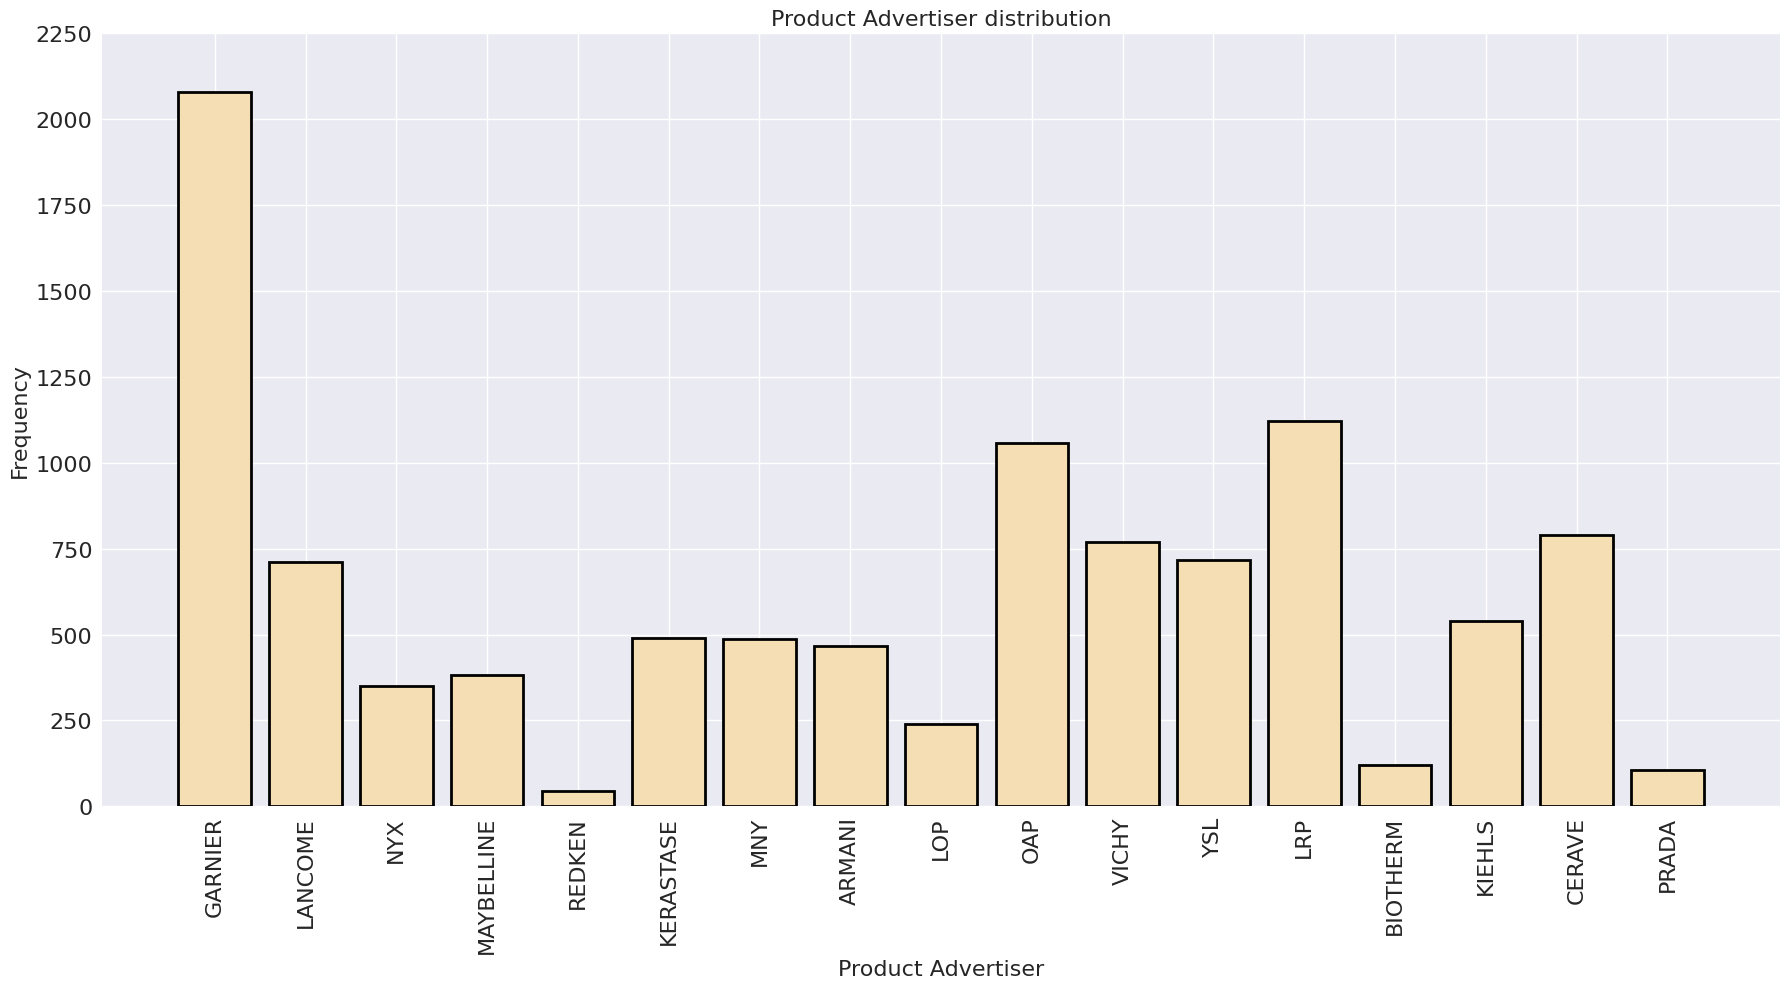

In [55]:
#plot bar plots of occurences per productadvertiser 
plt.rcParams["figure.figsize"] = (18,10)
product_advertiser_dict_c=dict(product_advertiser_list_counter)
product_advertiser_dict={k:product_advertiser_dict_c[k] for k in unique_product_advertiser}

# create a figure and axis object
fig, ax = plt.subplots()

# create a bar plot of the dictionary
ax.bar(product_advertiser_dict.keys(), product_advertiser_dict.values(),edgecolor='black',linewidth=2, color='#F5DEB3')

# set the title and axis labels
ax.set_title('Product Advertiser distribution', fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()
yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/Product_Advertiser.jpg',dpi=300)

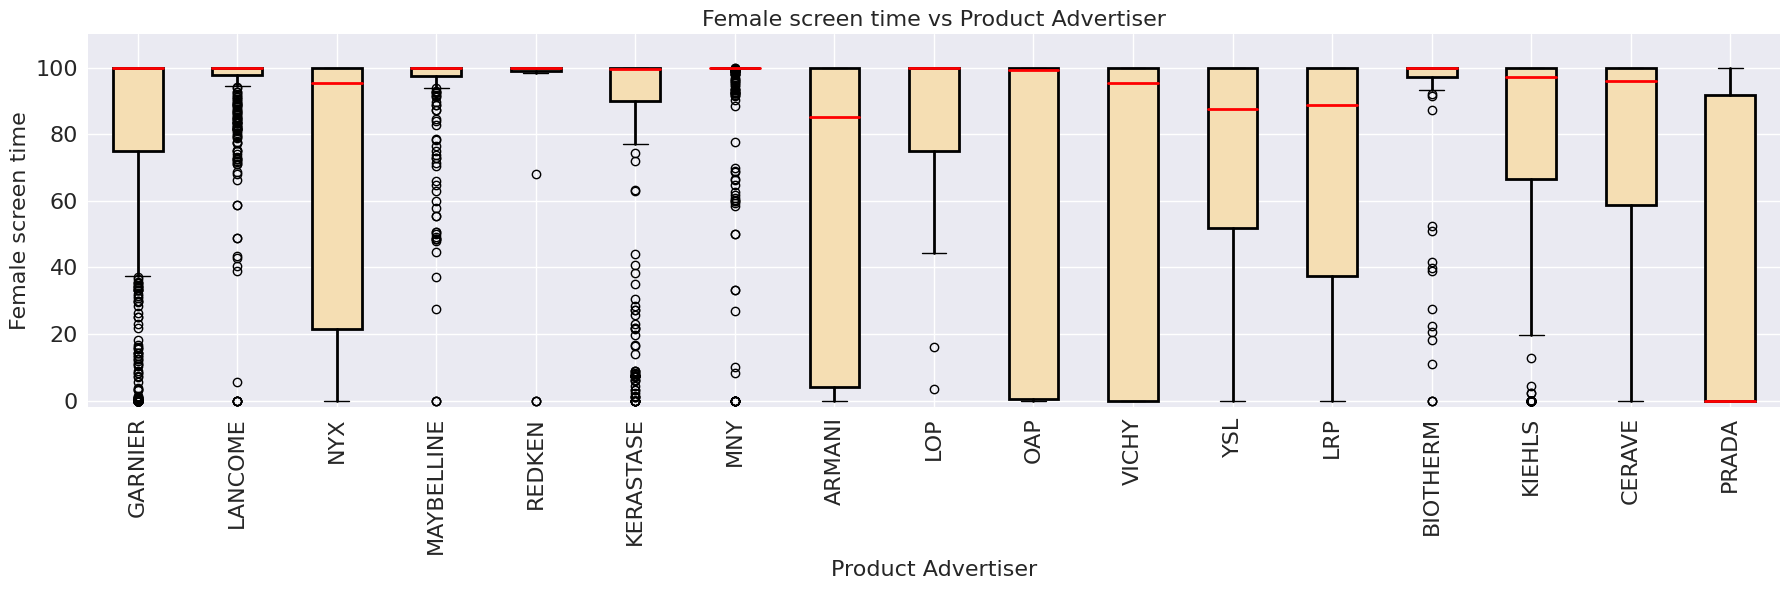

In [63]:
#plot female screen time

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)


# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(female_screen_time_list, labels=unique_product_advertiser, patch_artist=True, 
               boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Female screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Female screen time', fontsize=16)


# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-2,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)

#plt.show()
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/female_screentime_Product_Advertiser.jpg',dpi=300)

In [14]:
female_screen_time_list

[[3.1674208144796303,
  0.0,
  98.03921568627449,
  99.3127147766322,
  99.4604316546762,
  68.3168316831683,
  67.7852348993288,
  99.3589743589743,
  100.0,
  84.05797101449271,
  98.8700564971751,
  100.0,
  99.2957746478873,
  100.0,
  1.2931034482758599,
  98.3606557377049,
  11.9047619047619,
  98.8826815642458,
  100.0,
  0.0,
  88.8888888888888,
  100.0,
  97.26027397260269,
  89.3617021276595,
  80.2083333333333,
  100.0,
  0.0,
  89.3617021276595,
  97.2222222222222,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  100.0,
  98.98989898989899,
  0.0,
  97.26027397260269,
  100.0,
  100.0,
  100.0,
  100.0,
  89.1304347826086,
  100.0,
  99.5594713656387,
  99.8565279770444,
  100.0,
  99.6363636363636,
  100.0,
  100.0,
  100.0,
  30.7692307692307,
  93.8775510204081,
  100.0,
  100.0,
  91.48936170212761,
  99.6610169491525,
  89.8734177215189,
  82.4561403508771,
  84.0,
  92.3076923076923,
  nan,
  100.0,
  95.9459459459459,
  98.7394957983193,
  100.0,
  100.0,
  100.0,
  10

In [68]:
#skin tone analysis
ls_tone_list=[]
md_tone_list=[]
dk_tone_list=[]

for advertiser_name in unique_product_advertiser:
    
    subsampled_data=video_data[video_data['ProductAdvertiser']==advertiser_name]
    #drop na rows
    light_skin_tone=list(subsampled_data['light_skintone_screen_time'])
    med_skin_tone=list(subsampled_data['medium_skintone_screen_time'])
    dark_skin_tone=list(subsampled_data['dark_skintone_screen_time'])
    
    
    light_tone_list = [x*100 for x in light_skin_tone if x is not None and not math.isnan(x)]
    med_tone_list=[x*100 for x in med_skin_tone if x is not None and not math.isnan(x)]
    dark_tone_list=[x*100 for x in dark_skin_tone if x is not None and not math.isnan(x)]
    
    
    #female_sc_time=[f*100 for f in female_sc_time]
    #print(min(new_list),advertiser_name)
    
    dk_tone_list.append(dark_tone_list)
    md_tone_list.append(med_tone_list)
    ls_tone_list.append(light_tone_list)

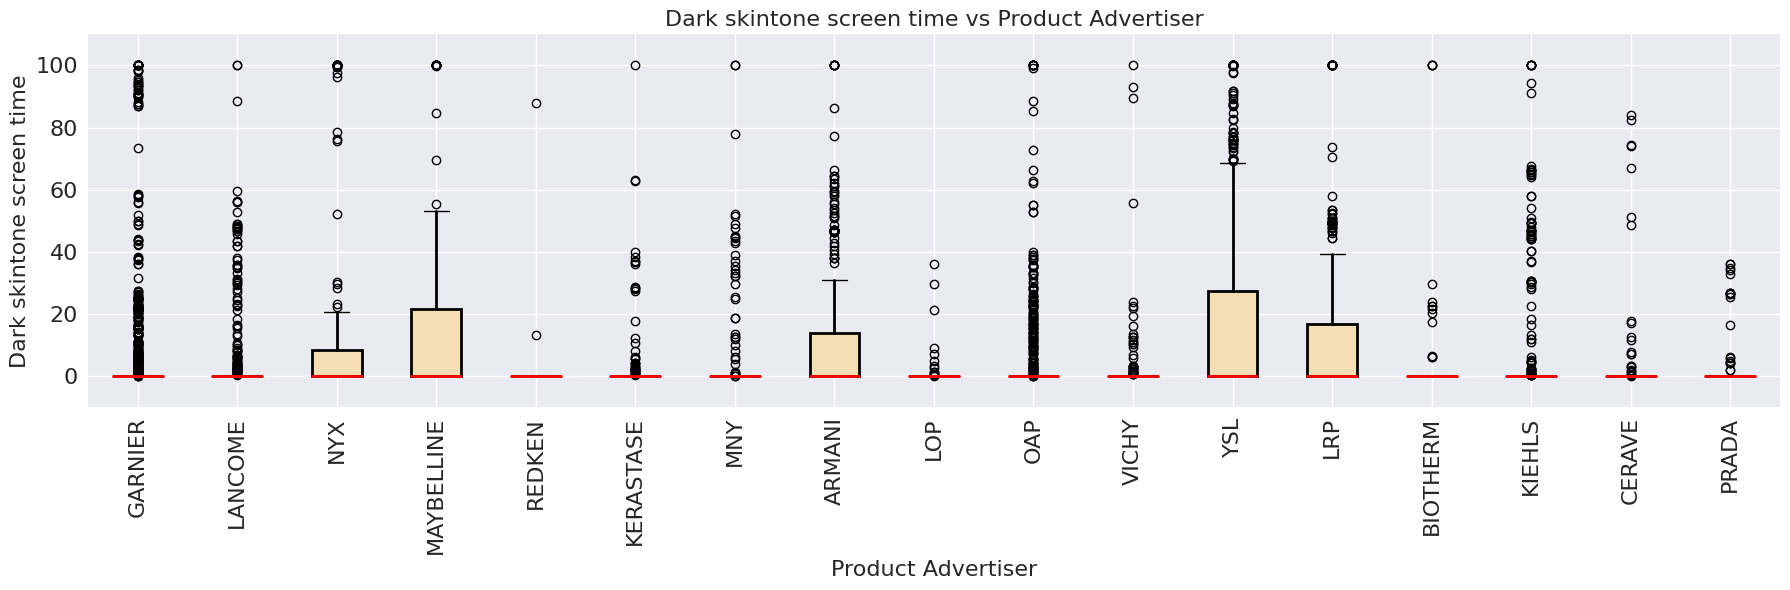

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)


# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(dk_tone_list, 
          labels=unique_product_advertiser, 
          patch_artist=True, 
          boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Dark skintone screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Dark skintone screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-10,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/dark_skintone_Product_Advertiser.jpg',dpi=300)

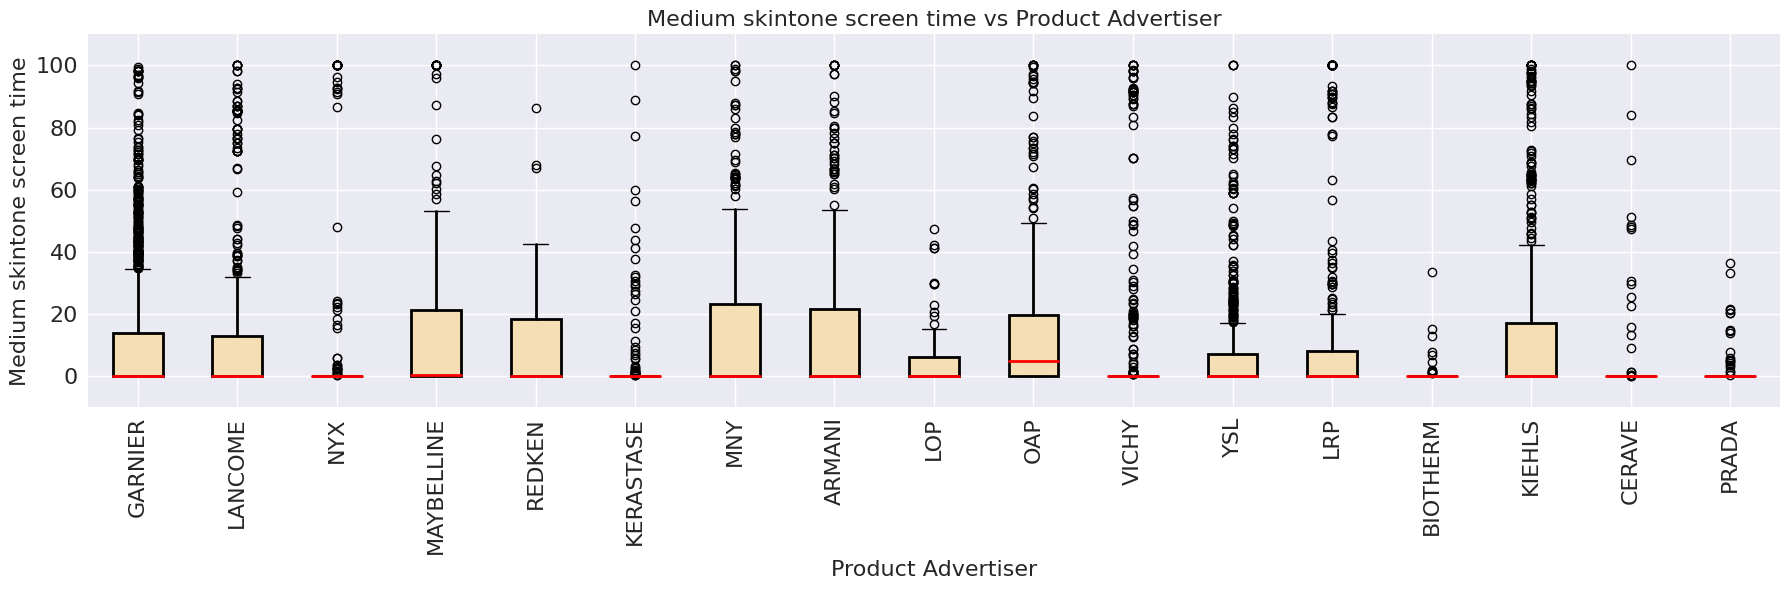

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)

# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(md_tone_list, 
          labels=unique_product_advertiser, 
          patch_artist=True, 
          boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Medium skintone screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Medium skintone screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-10,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/medium_skintone_Product_Advertiser.jpg',dpi=300)

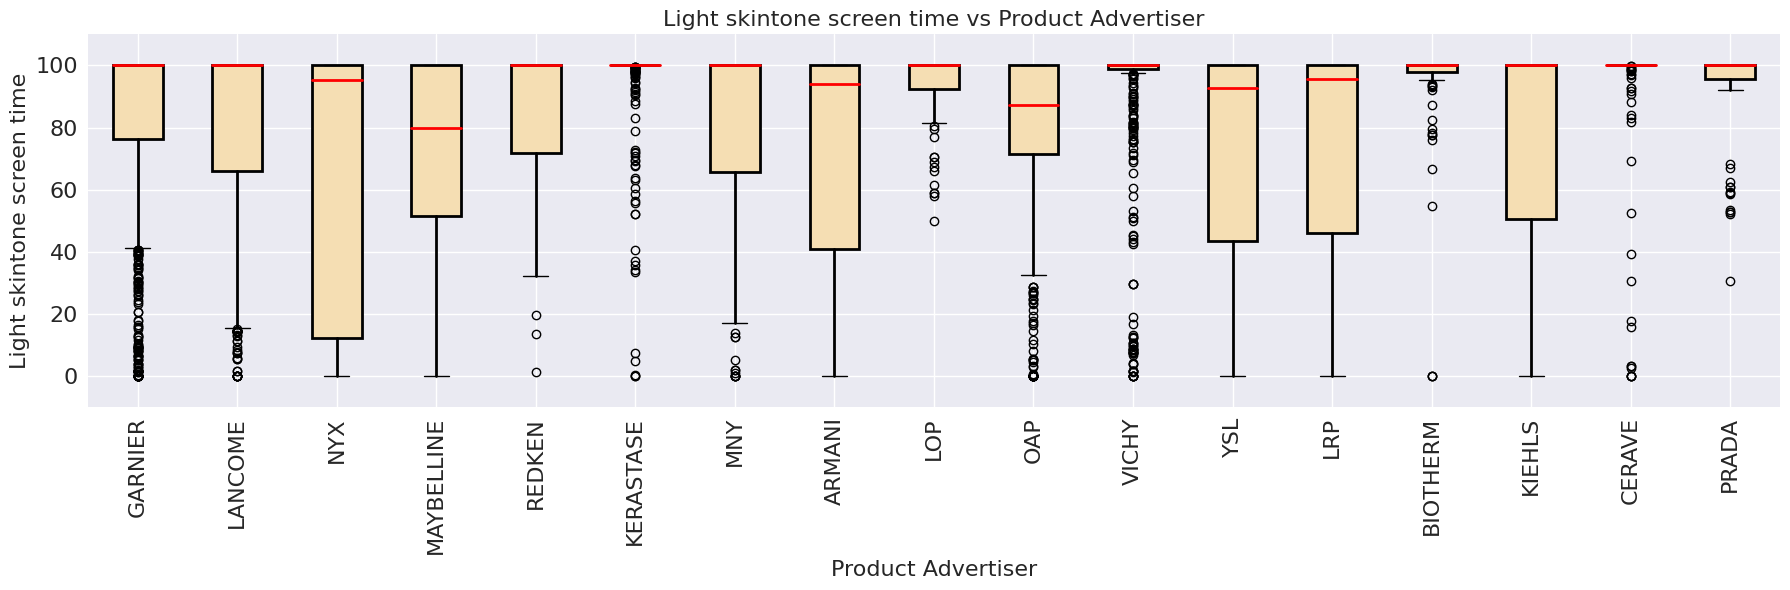

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)

# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(ls_tone_list, 
          labels=unique_product_advertiser, 
          patch_artist=True, 
          boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Light skintone screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Light skintone screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-10,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/light_skintone_Product_Advertiser.jpg',dpi=300)

In [87]:
#age plot distribution

age_2_dist_list=[]
age_3_dist_list=[]
age_4_dist_list=[]
age_5_dist_list=[]

for advertiser_name in unique_product_advertiser:
    
    subsampled_data=video_data[video_data['ProductAdvertiser']==advertiser_name]
    
    age_2_data=list(subsampled_data['age_2_screen_time'])
    age_3_data=list(subsampled_data['age_3_screen_time'])
    age_4_data=list(subsampled_data['age_4_screen_time'])
    age_5_data=list(subsampled_data['age_5_screen_time'])
    
    
    age_2_list=[x*100 for x in age_2_data if x is not None and not math.isnan(x)]
    age_3_list=[x*100 for x in age_3_data if x is not None and not math.isnan(x)]
    age_4_list=[x*100 for x in age_4_data if x is not None and not math.isnan(x)]
    age_5_list=[x*100 for x in age_5_data if x is not None and not math.isnan(x)]
    
    
    age_2_dist_list.append(age_2_list)
    age_3_dist_list.append(age_3_list)
    age_4_dist_list.append(age_4_list)
    age_5_dist_list.append(age_5_list)

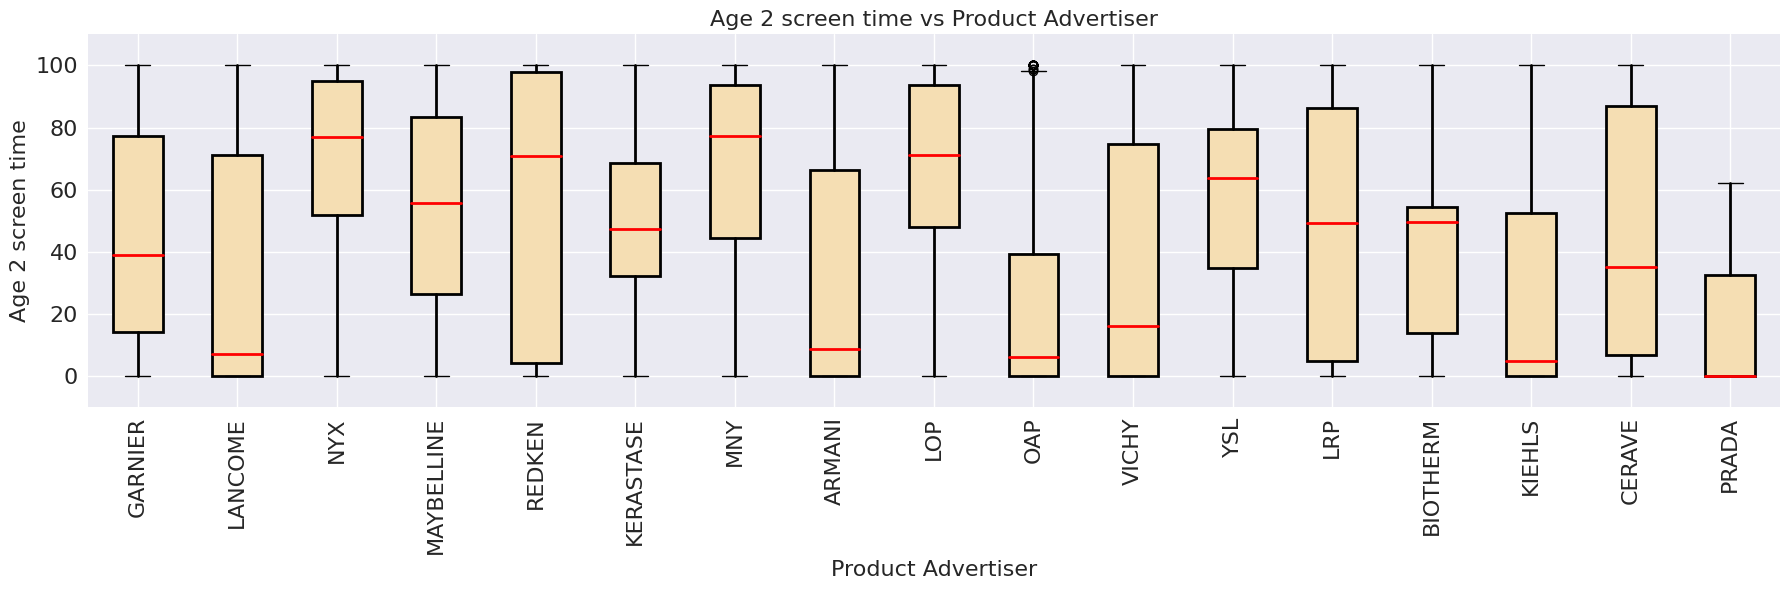

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)


# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(age_2_dist_list, 
          labels=unique_product_advertiser, 
          patch_artist=True, 
          boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Age 2 screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Age 2 screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-10,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/age_2_screen_time_Product_Advertiser.jpg',dpi=300)

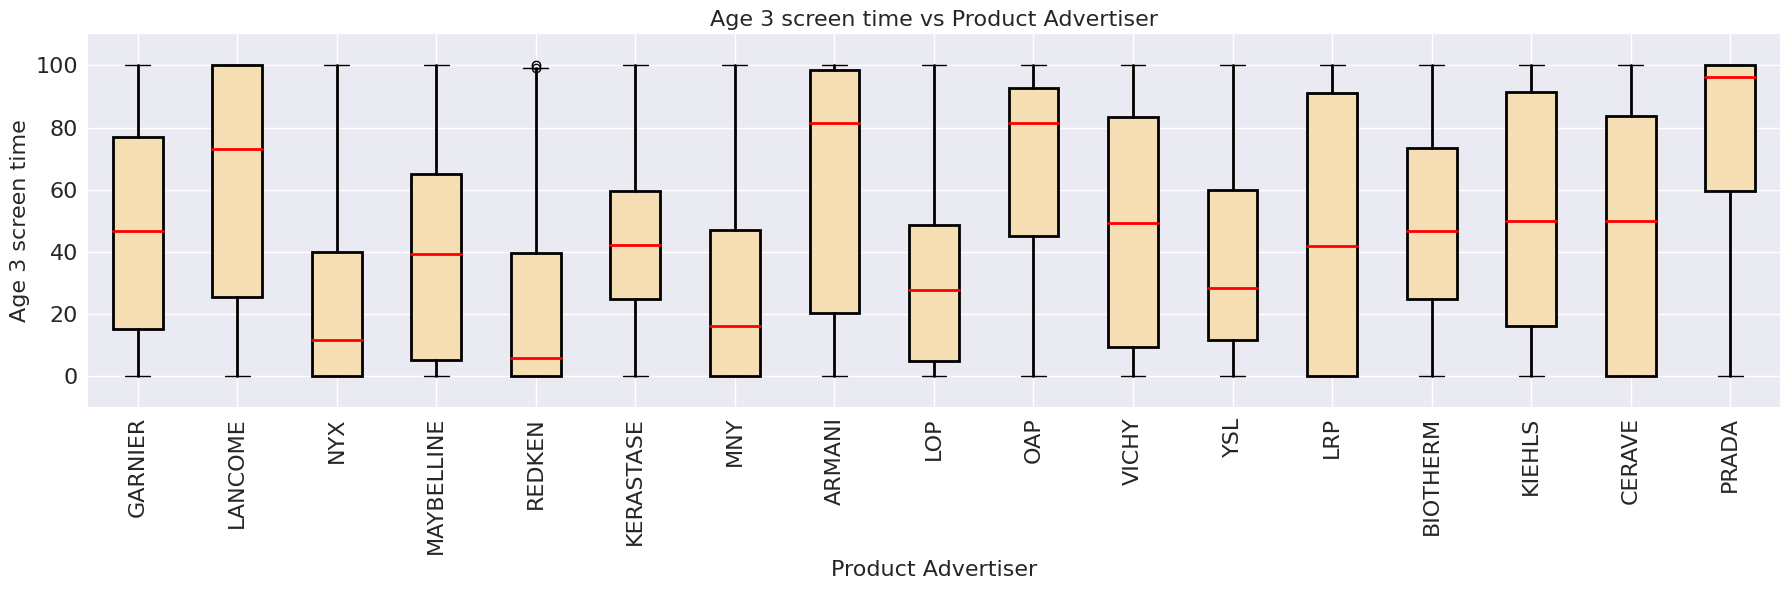

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)


# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(age_3_dist_list, 
          labels=unique_product_advertiser, 
          patch_artist=True, 
          boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Age 3 screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Age 3 screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-10,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/age_3_screen_time_Product_Advertiser.jpg',dpi=300)

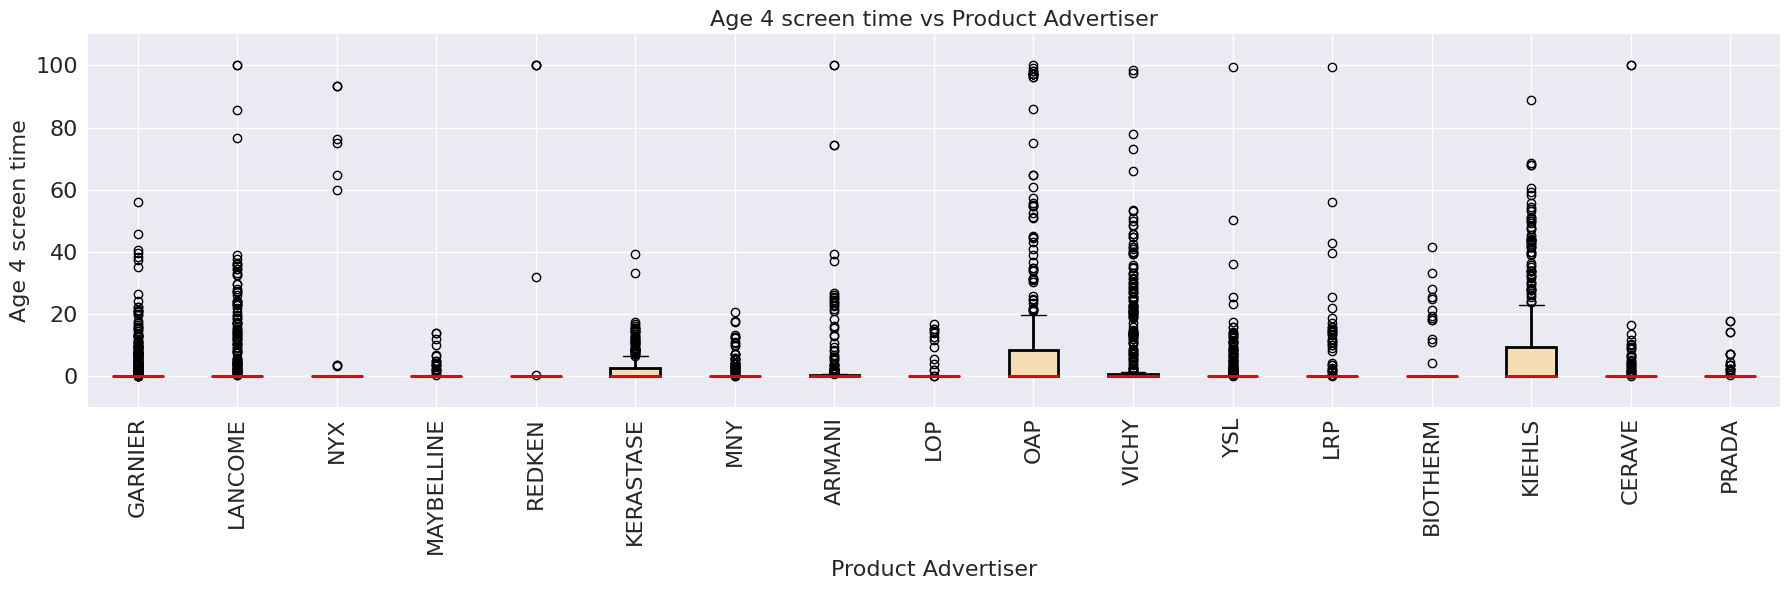

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)


# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(age_4_dist_list, 
          labels=unique_product_advertiser, 
          patch_artist=True, 
          boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Age 4 screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Age 4 screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-10,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/age_4_screen_time_Product_Advertiser.jpg',dpi=300)

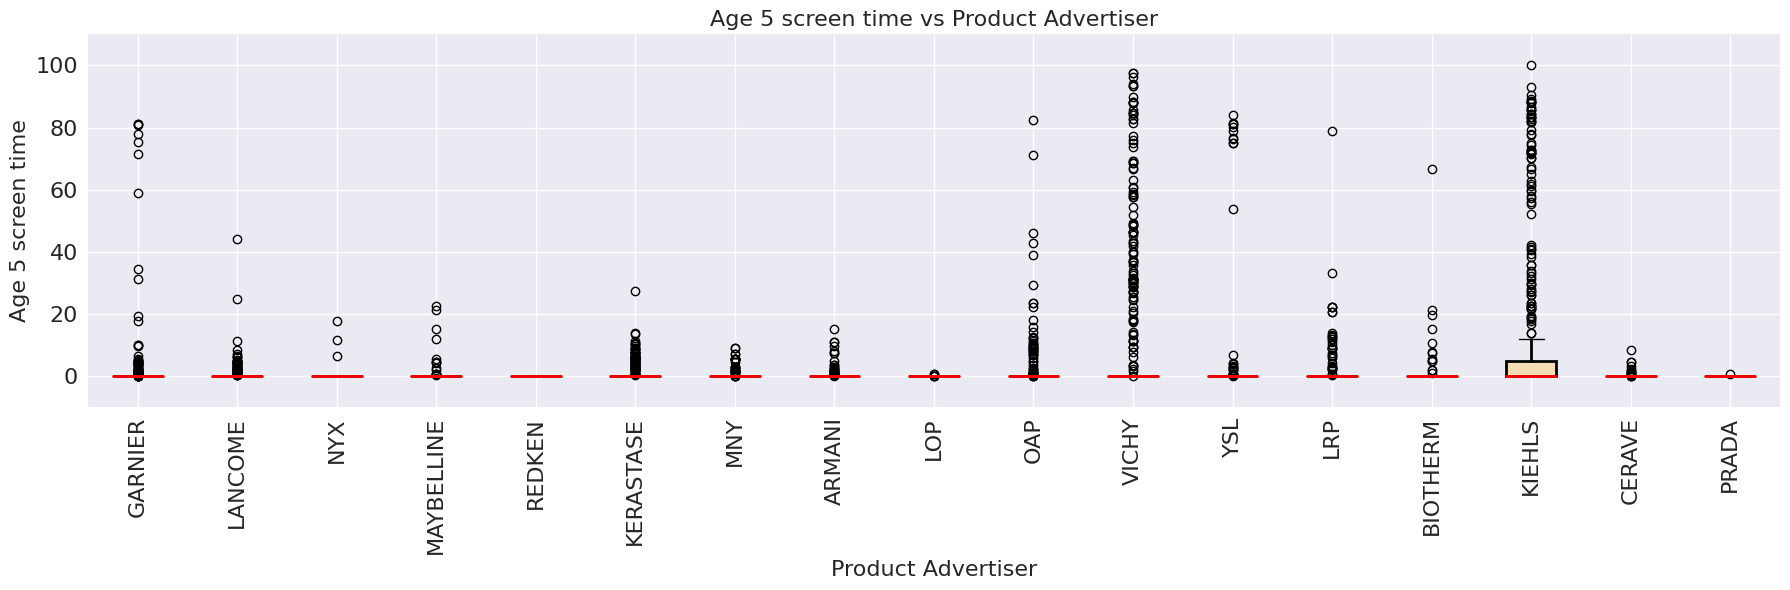

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')

plt.rcParams["figure.figsize"] = (18,6)


# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data with custom labels
ax.boxplot(age_5_dist_list, 
          labels=unique_product_advertiser, 
          patch_artist=True, 
          boxprops={'facecolor':'#F5DEB3', 'linewidth': 2},
          whiskerprops={'linewidth': 2},
          medianprops={'linewidth': 2, 'color': 'red'})

# set the title and axis labels
ax.set_title('Age 5 screen time vs Product Advertiser',fontsize=16)
ax.set_xlabel('Product Advertiser', fontsize=16)
ax.set_ylabel('Age 5 screen time', fontsize=16)

# get the x-tick labels
labels = ax.get_xticklabels()

yticks = ax.get_yticks()
ax.set_yticks(yticks)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylim(-10,110)

# set the rotation angle for the labels
ax.set_xticklabels(labels, rotation=90, fontsize=16)
plt.tight_layout()
plt.savefig('/data/digbose92/MuSE_Loreal_study/Figs/age_5_screen_time_Product_Advertiser.jpg',dpi=300)